# moscot and cl-TOME growth rates to apotosis rates

This notebook calculates apoptosis rates out of the growth rates

In [ ]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy
from matplotlib.pyplot import figure
from scipy.stats import ttest_1samp


from moscot.problems.time._lineage import TemporalProblem

In [2]:
Path="/home/mgander/moscot-framework_reproducibility/data/mouse_temporal"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']
cells=[32, 80, 100, 120, 400, 660, 1720, 4500, 8200, 15000, 30000, 60000, 73000, 90000, 90000, 200000, 1100000, 2600000, 6000000, 13000000]
Cell_number_dict={}
for i in range(20):
    Cell_number_dict[ts[i]]=cells[i]

In [3]:
tome_apoptosis_rate=[]
for i in range(19):
    ts0=ts[i]
    ts1=ts[i+1]
    gr=np.load(f'{Path}/TOME_maps_growth_rate_and_driver_genes_analysis/{ts0}_growth_rates.npy')
    gr=gr/gr.mean()*Cell_number_dict[ts1]/Cell_number_dict[ts0]
    cell_dying=np.sum((1-gr[gr<1]))
    tome_apoptosis_rate.append(float(cell_dying/len(gr)))

In [48]:
moscot_apoptosis_rate=[]
for i in range(19):
    ts0=ts[i]
    ts1=ts[i+1]
    gr=np.load(f'{Path}/moscot_maps_growth_rate_and_driver_genes_analysis/{ts0}_growth_rates.npy')
    gr=gr/gr.mean()*Cell_number_dict[ts1]/Cell_number_dict[ts0]
    cell_dying=np.sum((1-gr[gr<1]))
    moscot_apoptosis_rate.append(float(cell_dying/len(gr)))

In [49]:
df=pd.DataFrame({'Ap_rate':[*moscot_apoptosis_rate, *tome_apoptosis_rate], 'Method':[*['moscot']*19, *['clTOME']*19], 'day':[*ts[:-1], *ts[:-1]]})

In [50]:
import mplscience
mplscience.set_style(reset_current=True)

pal=sns.color_palette()
paln=pal.copy()
paln[0]=np.array([13,111,178])/255

/tmp/ipykernel_26491/342913630.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g0=sns.lineplot(ax=axs, data=df, x='day', y="Ap_rate", hue='Method', palette=paln, marker='o', linewidth = 2.5, markersize=8)


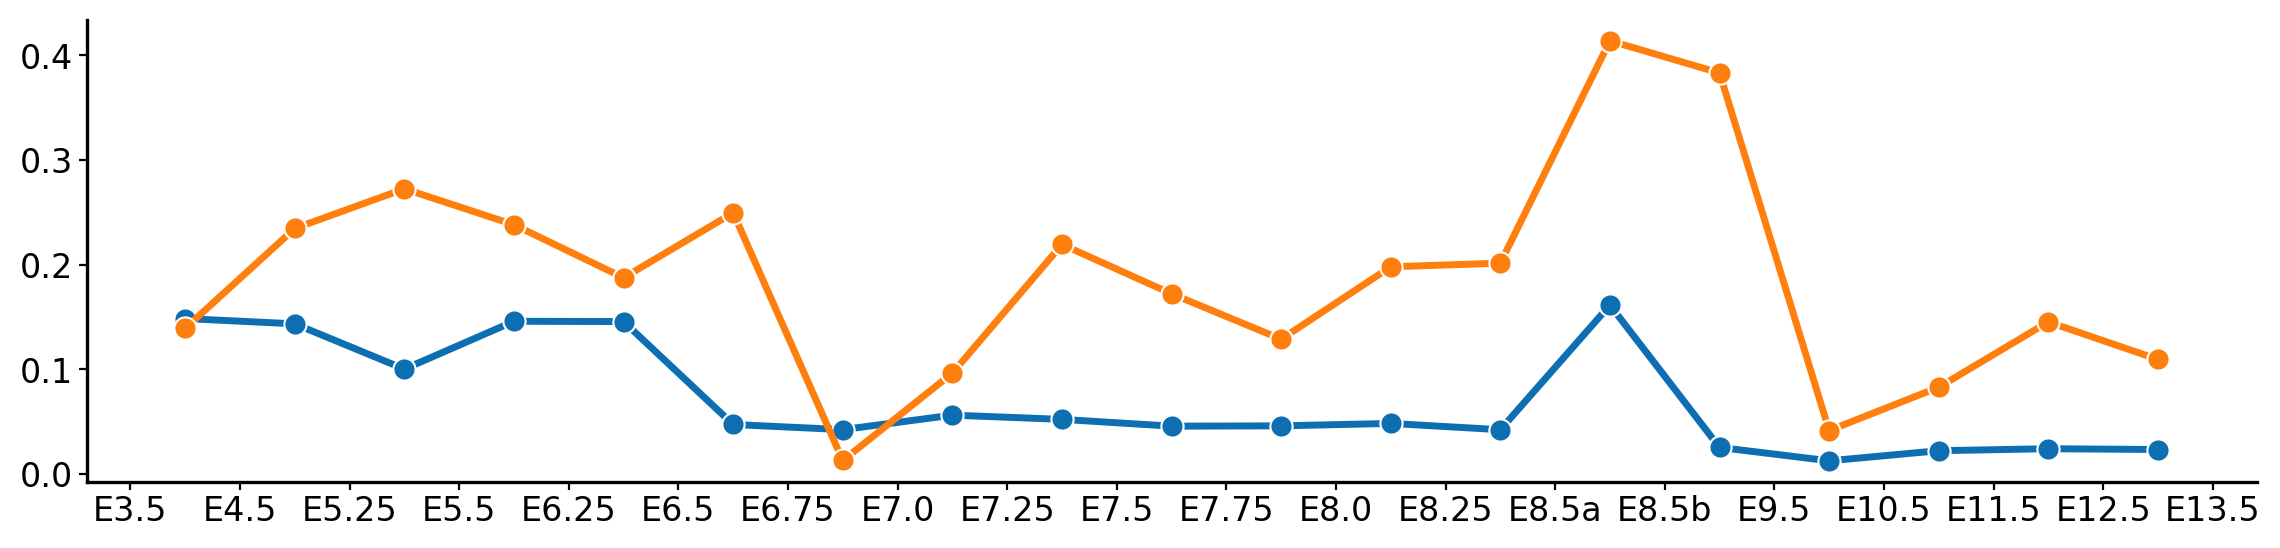

In [55]:
fig, axs = plt.subplots(1, 1, figsize=(14, 3), dpi=200)

g0=sns.lineplot(ax=axs, data=df, x='day', y="Ap_rate", hue='Method', palette=paln, marker='o', linewidth = 2.5, markersize=8)
g0.set(xticks=np.linspace(-0.5,18+0.5,20))  # remove the tick labels
g0.set(xticklabels=ts)  # remove the tick labels
g0.set(xlabel=None)  # remove the axis label
g0.set(ylabel=None)  # remove the axis label
axs.legend_.remove()

#axs.set_ylim(0.9, 1.02)
plt.show()